In [3]:
# EDA tools 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

* Load Data

In [4]:
# Load Dataset
df=pd.read_csv("data/heart_disease.csv")
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


* Data Exploration

In [8]:
# Check if data is balanced
df["output"].value_counts() 

output
1    165
0    124
Name: count, dtype: int64

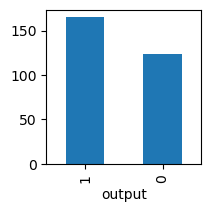

In [18]:
#Visualize the dataset is balanced or not 
df["output"].value_counts().plot(figsize=(2,2),kind='bar');

In [10]:
# Information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


In [12]:
# Additional Information like mean std min max etc 
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.010381,0.678201,1.020761,131.377163,247.961938,0.145329,0.515571,150.231834,0.318339,1.007612,1.418685,0.712803,2.314879,0.570934
std,9.132316,0.467977,1.027192,17.518432,51.596208,0.353043,0.514309,22.899650,0.466640,1.133491,0.613333,1.022596,0.596128,0.495801
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* Try to find patterns by comparing 

In [19]:
df.sex.value_counts()

sex
1    196
0     93
Name: count, dtype: int64

In [21]:
# Compare the Target columns with sex columns 
pd.crosstab(df.output,df.sex)

sex,0,1
output,,
0,21,103
1,72,93


In [33]:
f'{72/(21+72)*100:.2f}% chance that if we predicting on female she will have heart_disease)'

'77.42% chance that if we predicting on female she will have heart_disease)'

In [38]:
f'{93/(103+93)*100:.2f}% chance that if we predicting on male he will have heart disease'

'47.45% chance that if we predicting on male he will have heart disease'

* Lets see things in pretty way so it stays in our mind 

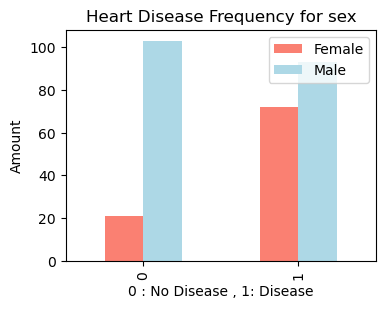

In [46]:
pd.crosstab(df.output,df.sex).plot(kind='bar',figsize=(4,3),color=["salmon","lightblue"])
plt.xlabel("0 : No Disease , 1: Disease")
plt.ylabel("Amount")
plt.title("Heart Disease Frequency for sex")
plt.legend(["Female","Male"])
plt.show()

* Lets find more patterns

In [51]:
df.thalachh.value_counts()

thalachh
162    11
160     9
163     9
152     8
173     8
       ..
190     1
185     1
188     1
137     1
134     1
Name: count, Length: 90, dtype: int64

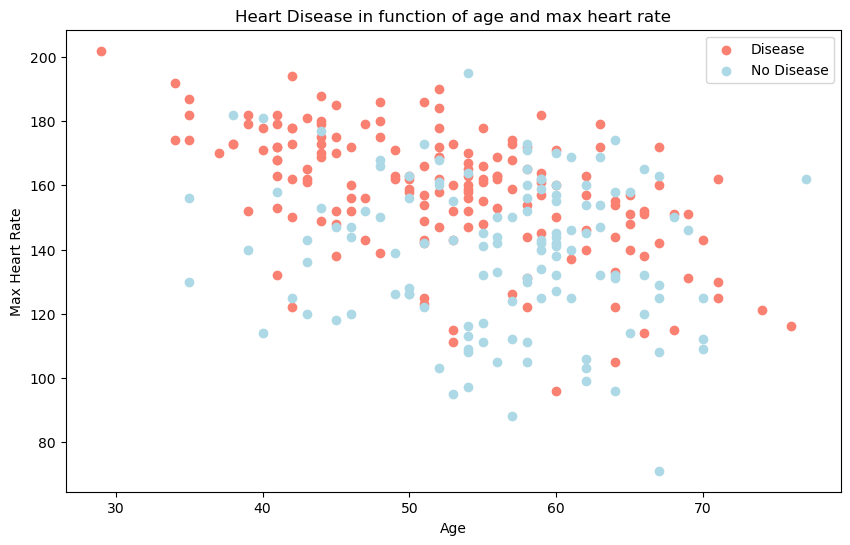

In [55]:

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.output==1],
           df.thalachh[df.output==1],
            c='salmon')
plt.scatter(df.age[df.output==0],
           df.thalachh[df.output==0],
           c="lightblue")
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

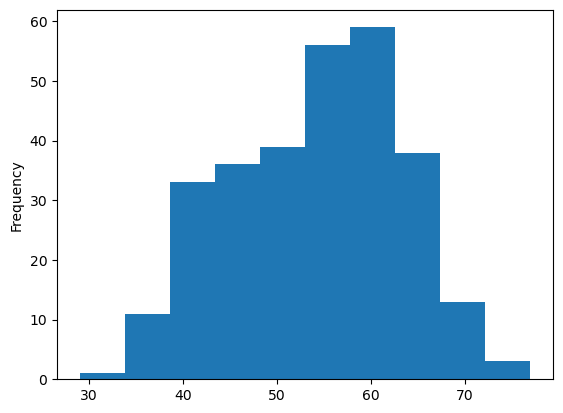

In [57]:
# lets check the distribution of the age column
df.age.plot.hist();

* Chestpain vs output

In [61]:
pd.crosstab(df.cp,df.output)

output,0,1
cp,,
0,87,39
1,13,41
2,17,69
3,7,16


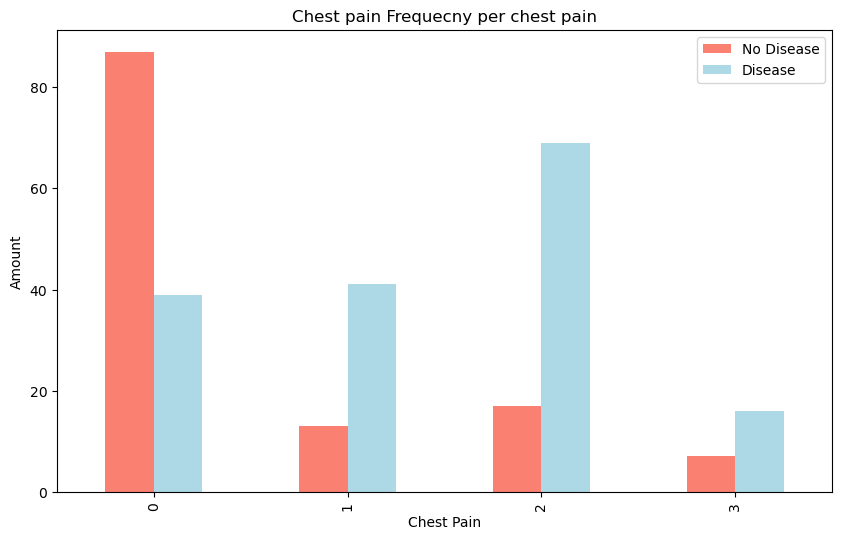

In [66]:
pd.crosstab(df.cp,df.output).plot(
    kind="bar",
    figsize=(10,6),
    color=["salmon","lightblue"]
)
plt.title("Chest pain Frequecny per chest pain")
plt.xlabel("Chest Pain")
plt.ylabel('Amount')
plt.legend(["No Disease","Disease"])
plt.show();

In [67]:
# Lets Build a correlation matrix 
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.122710,-0.057396,0.267559,0.236944,0.106149,-0.123862,-0.397116,0.100256,0.200817,-0.166915,0.272858,0.058075,-0.202999
sex,-0.122710,1.000000,-0.058286,-0.054180,-0.197087,0.031852,-0.044028,-0.053280,0.136829,0.110022,-0.049142,0.081922,0.215120,-0.282884
cp,-0.057396,-0.058286,1.000000,0.077325,-0.121056,0.135273,0.051966,0.272437,-0.354301,-0.125687,0.090871,-0.126528,-0.192167,0.399352
trtbps,0.267559,-0.054180,0.077325,1.000000,0.152325,0.147180,-0.089869,-0.036156,0.068087,0.204915,-0.135932,0.089218,0.075367,-0.136812
chol,0.236944,-0.197087,-0.121056,0.152325,1.000000,0.028135,-0.161116,-0.038819,0.101743,0.069035,-0.016172,0.077776,0.116215,-0.128364
fbs,0.106149,0.031852,0.135273,0.147180,0.028135,1.000000,-0.069875,0.011280,0.034350,-0.017525,-0.057484,0.116013,-0.003711,-0.019425
restecg,-0.123862,-0.044028,0.051966,-0.089869,-0.161116,-0.069875,1.000000,0.067058,-0.093064,-0.096694,0.138869,-0.087197,-0.021710,0.176076
thalachh,-0.397116,-0.053280,0.272437,-0.036156,-0.038819,0.011280,0.067058,1.000000,-0.381906,-0.354159,0.384908,-0.211407,-0.111686,0.415537
exng,0.100256,0.136829,-0.354301,0.068087,0.101743,0.034350,-0.093064,-0.381906,1.000000,0.293435,-0.261067,0.126772,0.225066,-0.443121
oldpeak,0.200817,0.110022,-0.125687,0.204915,0.069035,-0.017525,-0.096694,-0.354159,0.293435,1.000000,-0.587959,0.189418,0.259026,-0.432840


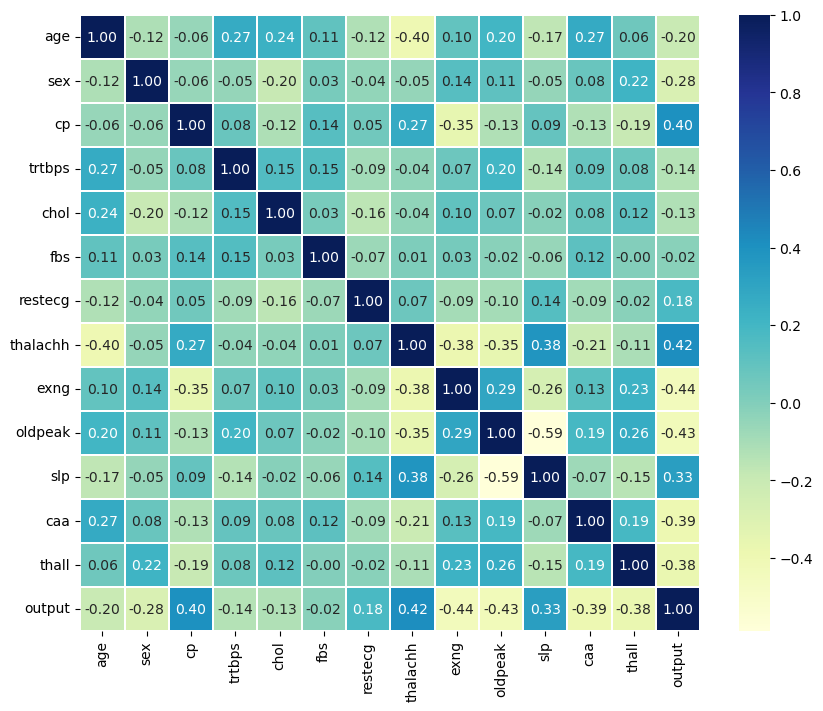

In [68]:
# Lets make it pretty 
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.2,fmt=".2f",cmap="YlGnBu")

# Now lets START Building Models

In [71]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
# Setting seed 
np.random.seed(42)
# Split into features and labels
X=df.drop("output",axis=1)
y=df["output"]
# Split into train test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [74]:
X_train.shape, y_train.shape

((231, 13), (231,))

In [75]:
X_test.shape,y_test.shape

((58, 13), (58,))

# Place Models in Dictionary

In [87]:
models={"Logistic_Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "RandomForest":RandomForestClassifier(),
       }

In [88]:
# Create a Fucntion to fit and score 
def fit_and_score(models,X_train,y_train,X_test,y_test):
    """
    This Function is Created for training and evaluating Models that are placed in dictionary
    Models: Dictionary Of Models
    X_train: Training Features
    y_train: Training Labels
    X_test: Testing Features
    y_test: Testing Labels
    
    This function will return a model_scores (dictionary) with evaluated model name and their score
    """
    np.random.seed(42)
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
        

In [90]:
import warnings
warnings.filterwarnings("ignore")
fit_and_score(models=models,
              X_train=X_train,
             y_train=y_train,
             X_test=X_test,
             y_test=y_test)

{'Logistic_Regression': 0.8620689655172413,
 'KNN': 0.6206896551724138,
 'RandomForest': 0.8448275862068966}

# Improving our Model
* Hyperparamter optimization
* Feature Importance
* 
`Also do`
* cross validataion
* Precision recall f1
* classification report
* ROC Curve
* AUC Score

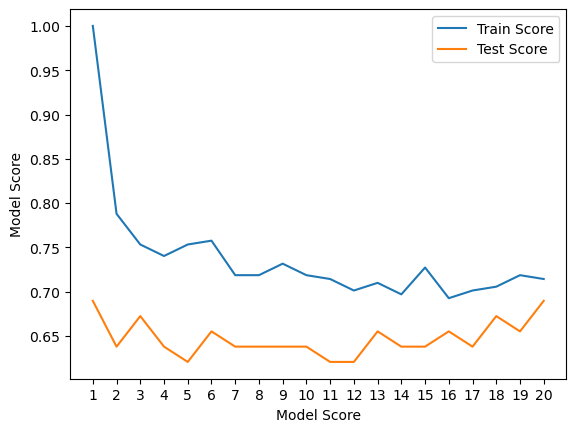

In [99]:
#  Lets Tune first KNN
train_scores=[]
test_scores=[]

neighbors=np.arange(1,21,1)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Model Score")
plt.ylabel("Model Score")
plt.legend();

In [98]:
print(f'Max KNN Score on test data: {max(test_scores)*100:.2f} %')

Max KNN Score on test data: 68.97 %


* Hyperparameter Tuning with the RandomSearchCV

In [101]:
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}

rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [102]:
# lets fine tune Logistic Regression Model now 
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [104]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [105]:
rs_log_reg.score(X_test,y_test)

0.8620689655172413

In [107]:
# Lets now fine tune RandomForest Model
np.random.seed(43)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                        cv=5,
                        verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [108]:
rs_rf.best_params_

{'n_estimators': np.int64(360),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [109]:
rs_rf.score(X_test,y_test)

0.8448275862068966

# Hyperparameter Tuning using Grid Search CV 

In [110]:
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=5)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.617 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.739 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.652 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, solver=liblinear;, score=0.596 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, solver=liblinear;, score=0.717 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, solver=liblinear;, score=0.609 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, solver=liblinear;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.617 total time=   0.0s


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [111]:
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [112]:
gs_log_reg.score(X_test,y_test)

0.8620689655172413

# Evaluation
* AUC ROC
* Confusion Matrix
* Classification Report
* Precesssion
* Recall
* F1 Score


In [114]:
# Make predictions
y_preds=gs_log_reg.predict(X_test)

In [115]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test)

TypeError: RocCurveDisplay.__init__() takes 1 positional argument but 4 were given